# Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Linear Regression Problem

### 1

In [5]:
df = pd.read_excel("Real estate valuation data set.xlsx")

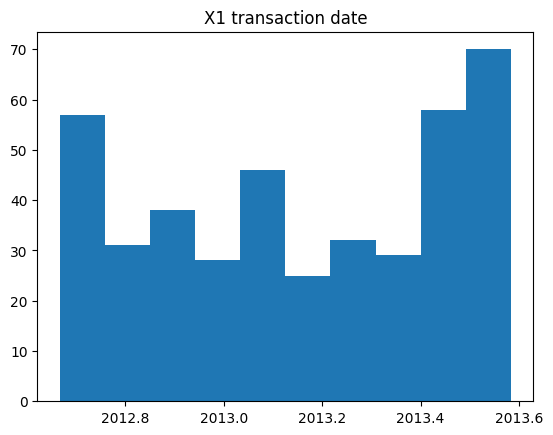

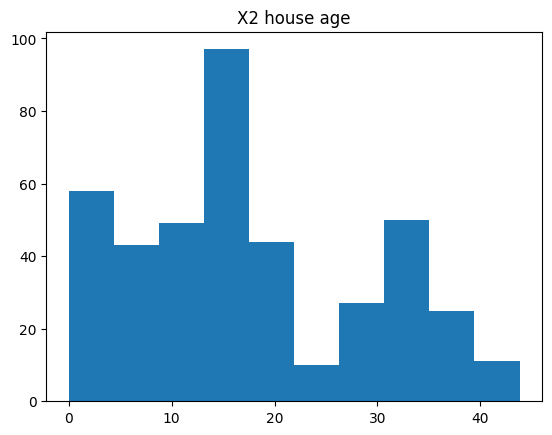

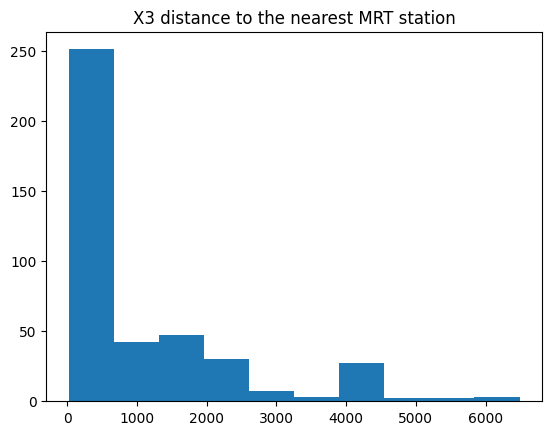

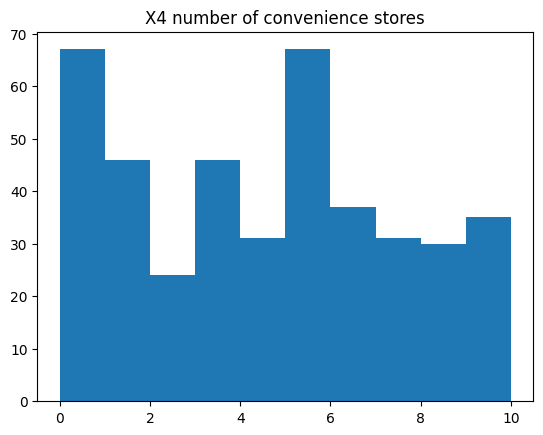

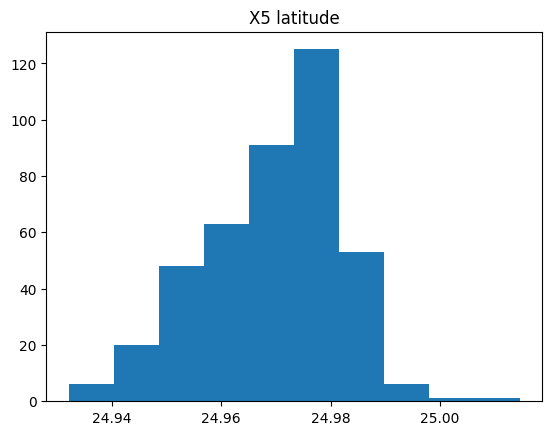

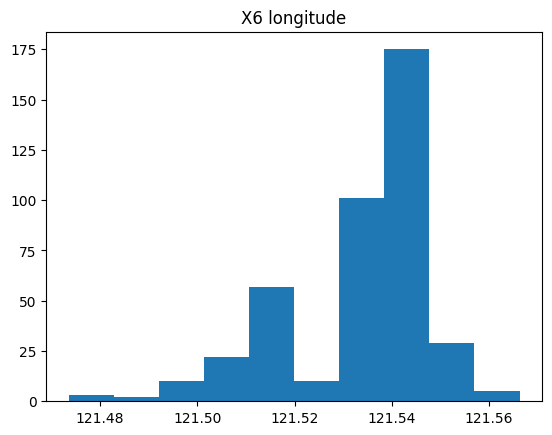

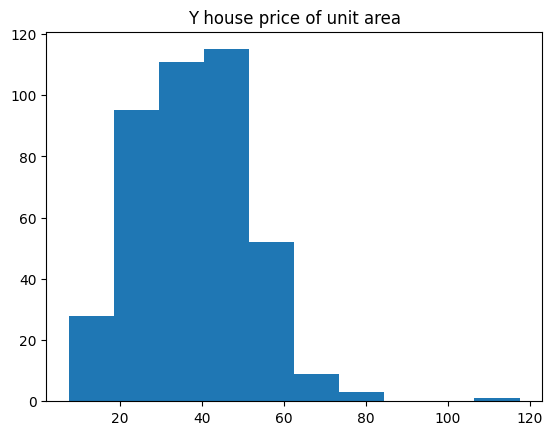

In [10]:
for title in df.columns[1:]:
    fig, ax = plt.subplots()
    ax.hist(df[title])
    ax.set_title(title)
    plt.show()

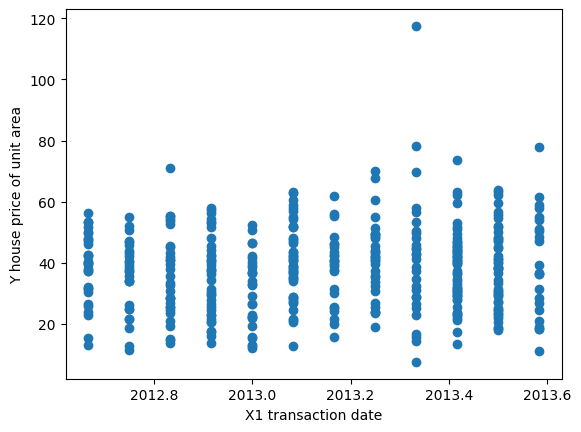

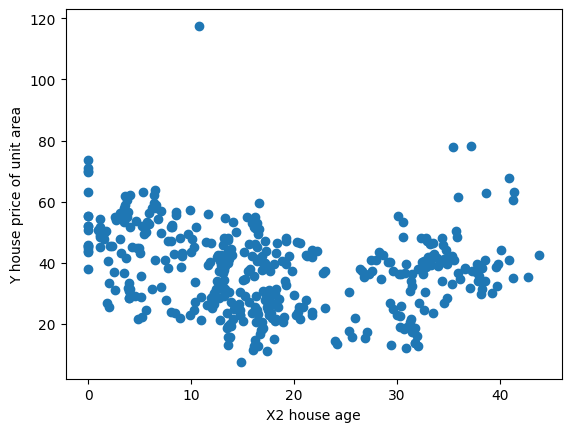

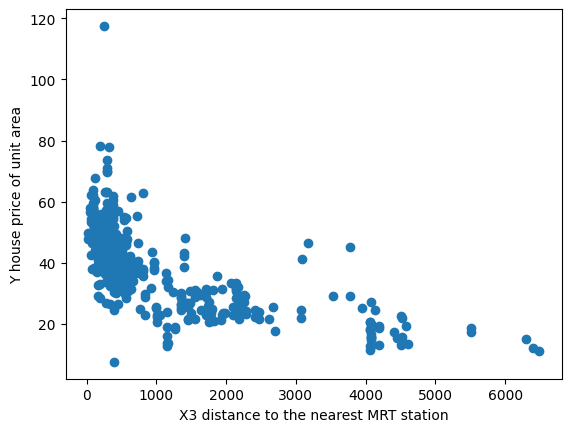

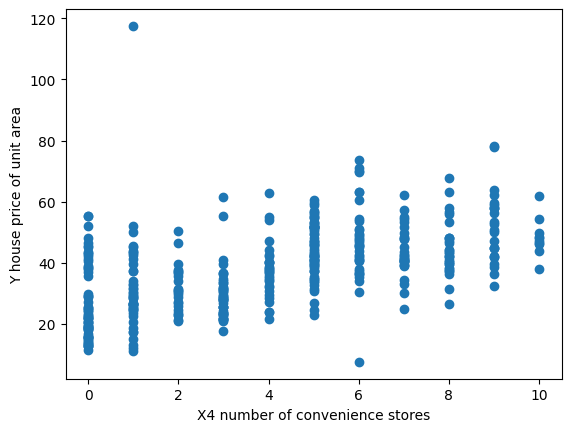

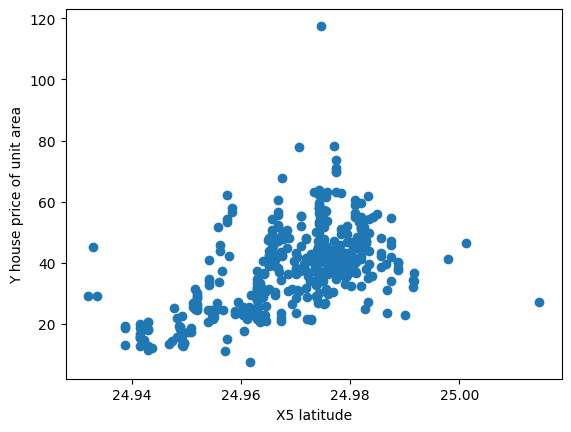

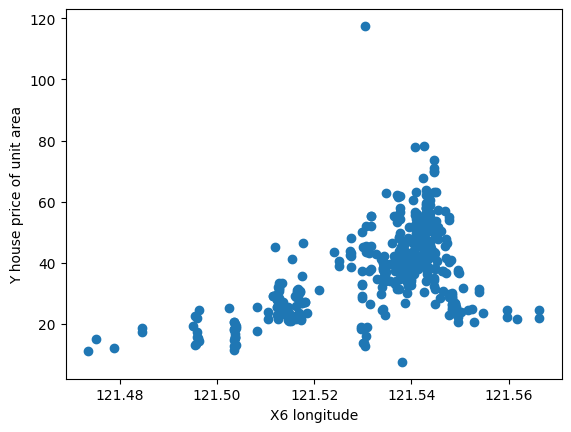

In [14]:
for title in df.columns[1:-1]:
    fig, ax = plt.subplots()
    ax.scatter(df[title], df[df.columns[-1]])
    ax.set_xlabel(title)
    ax.set_ylabel(df.columns[-1])
    plt.show()

The scatter plots reveal a potential outlier with a Y of about 120.  This data point appears as a potential outlier in every scatter plot because of how far removed it is from the rest of the Y values.  The scatter plot describing X6 and Y reveals another potential outlier in the form of a house with an especially large latitude.  If this means that the house exists in a location with especially different external conditions that are not reflected in the rest of the data then this may introduce a problem.  The X1 scatter plot shows a very slight trend of increasing value as the transaction date get closer to the present possibly indicating a small amount of predictive power.  The X2 scatter plot shows a quadratic relationship, possibly describing a trend where especially new and especially old houses are more valuable than middle-aged ones.  The X3 scatter plot shows relatively strong evidence of predictive power, indicating that distance to the nearest MRT station is inversely proportional to value.  The X4 scatter plot shows the same trend (and by extension possible predictive power) as X1.  X5 and X6 show a similar trend where larger quantities correspond to slightly higher value and may provide predictive power accordingly.

### 2

# Classification Problem

### 1